# RESTful Services

- Most apps follow **Client-Server** architecture. application side is the client or front-end part; it needs to talk to the backend to get or save the data. this communication happens using the **HTTP protocol**. On the server we export a bucnh of services that are accesible by HTTP protocol. The client can then directly call these services by sending http request. **REST (Representational State Transfer)** is basically a convention for building http services.

- We use simple http protocol principles to provide support to create, read, update and delete data. We refer to these operation as **CRUD Operations**

**HTTP METHODS**
- GET for getting data
- POST for creating data
- PUT for updating data
- DELETE for delete data

- With RESTful convention we expose resources such as customers using a simple meaningful addres and suppot various operations around them such as creating, updating and deleting them using standar HTTP methods.

# Introducing Express

- Express is the fast and lightweight framekork for building web applications.
- framework gives ]to our app a proper structure, doing the application code maintainable.

In [ ]:
// in console
// C:\Users\sebastian\Desktop\nodejs\04_Building RESTful API's Using Express
npm i express

# First Web Server

- *app.listen* methos takes the as argumentes the number of port, and an optional function that will be called when the server starts listening at the given port.

- In following inplementation we don´t have *if* blocks. We define new routes using app. 

In [ ]:
// index.js
//--------------------------
const express = require('express');
const app = express(); // By convention express object is called app

app.get('/', (req, res) => { // args: 1.path/url 2.callback function
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send([1,2,3]);
}); 

app.listen(3000, () => {
    console.log('listening on port 3000...')
});

# Nodemon

- **nodemon** is a package that watch any files with any extensions in a folder. 
- With **nodemon index.js** command, if we make a simple change in *index.js* nodemon restart our application due to changes. In this way we don´t have to do it manually anymore.

In [ ]:
// in console
npm i -g nodemon // installing node monitor
nodemon index.js // execute index.js file with nodemon

# Environment Variables

- Environment Variable is basicly a variable that is part of the environment in which a process runs. Its value is set outside the application.

- To read the value of **PORT** environmet variable we use **procces object**.

- Before using **process.env.PORT** we need to set *PORT* environment variable. 

- To set an environment variable we use **set**. In this case we use **set PORT=5000**. This is the proper way o assign a port to our NodeJS apps.

In [ ]:
// in console
//--------------------------------------------------------
set PORT=5000


// index.js
//--------------------------------------------------------
const express = require('express');
const app = express(); // By convention express object is called app

app.get('/', (req, res) => { // args: 1.path/url 2.callback function
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send([1,2,3]);
}); 

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});

# Route Parameters

- We use **route parameters** for essential or required values.
- We are going to add a route parameter **id** in the route. 

In [ ]:
// index.js
//--------------------------------------------------------
const express = require('express');
const app = express();

app.get('/', (req, res) => { 
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send([1,2,3]);
}); 

app.get('/api/courses/:id', (req,res) => {
    res.send(req.params.id);
});

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});

- We also can get an object with multiple params.

In [ ]:
// index.js
//--------------------------------------------------------
const express = require('express');
const app = express();

app.get('/', (req, res) => { 
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send([1,2,3]);
}); 

app.get('/api/courses/:id/:name', (req,res) => {
    res.send(req.params);
});

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});



//output
//-----------------------------
// {"id":"5","name":"math"}

- With express we can also get **query string parameters**. These are parameters that we add in the URL ater **?**. For example all the posts in in year 2018 and then sorted by their name.

- We use *string parameters* to provide additinal data.  

In [ ]:
// index.js
//--------------------------------------------------------
const express = require('express');
const app = express();

app.get('/', (req, res) => { 
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send([1,2,3]);
}); 

app.get('/api/posts/:year/:month', (req,res) => {
    res.send(req.query);
});

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});


// URL in Browser
//------------------------------
// http://localhost:5000/api/posts/2018/1?sortBy=name



//output
//-----------------------------
// {"sortBy":"name"}

# Handling HTTP Requests

In [ ]:
// index.js
//--------------------------------------------------------
const express = require('express');
const app = express();

const courses = [
    { id: 1, name: 'course1' },
    { id: 2, name: 'course2' },
    { id: 3, name: 'course3' },
    { id: 4, name: 'course4' },
];
app.get('/', (req, res) => { 
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send(courses);
}); 

app.get('/api/courses/:id', (req,res) => {
    let course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) res.status(404).send('The Course with the given ID was not found');
    res.send(course);
});

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});


// URL in Browser
//------------------------------
// http://localhost:5000/courses/3



//output
//-----------------------------
// {"id":3,"name":"course3"}

# Handling HTTP POST Request

- We are going to use http post request to create new course.
- We assume that in the body of request we have an object with *name* property.
- In order for **req.body.name** to work, we need to enable parsing up JSON object in the body of the request, because this feature is not enabled in express. To do that, we use **app.use(express.json())**. Basicly we are doing with this, is adding a piece of middleware.
- Finally, by cnvention, when we post an object to the server, it should return that object in the body of the response.

In [ ]:
// index.js
//--------------------------------------------------------
const express = require('express');
const app = express();

app.use(express.json());

const courses = [
    { id: 1, name: 'course1' },
    { id: 2, name: 'course2' },
    { id: 3, name: 'course3' },
    { id: 4, name: 'course4' },
];
app.get('/', (req, res) => { 
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send(courses);
}); 

app.post('/api/courses', (req, res) => {
    const course = {
        id: courses.lenght + 1,
        name = req.body.name 
    };
    courses.push(course);
    res.send(course);
});

app.get('/api/courses/:id', (req,res) => {
    let course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) res.status(404).send('The Course with the given ID was not found');
    res.send(course);
});

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});

# Calling Endpoints using Postman

- To call http services we use a chrome extension called **postman**.
- To install this extension, we search for *chrome postman* and add it to chrome. Then we run the extension and click on *take me straight to the app* in order to initialize without an account.
- In the app we create a new post using the localhost url.
- In the body of the request we select **raw**, and then **JSON**. With this we can put the JSON object.
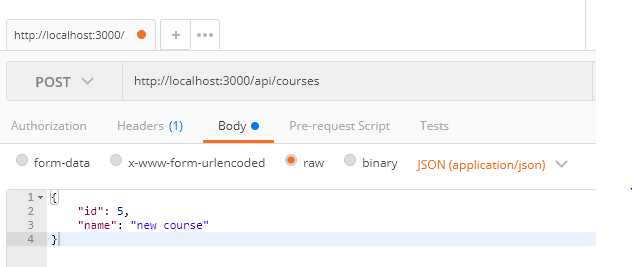

# Input Validation

- As a security best practice we never should trust what the client sends us. We should always validate the input.

In [ ]:
app.post('/api/courses', (req, res) => {
    if (!req.body.name || req.body.name.lenght < 3){
        //400 Bad Request
        res.status(400).send('Name is required and should be minimum 3 characters')
        return;
    };
    
    const course = {
        id: courses.lenght + 1,
        name = req.body.name 
    };
    courses.push(course);
    res.send(course);
});


- nodeJS has a package name **joi** for validation. We install this package using the command **npm i joi**.
- Finally we run *index.js* from terminal and click on *send* in *Postman*

In [ ]:
// index.js
//--------------------------------------------------------
const Joi = require('joi'); //return a class
const express = require('express');
const app = express();

app.use(express.json());

const courses = [
    { id: 1, name: 'course1' },
    { id: 2, name: 'course2' },
    { id: 3, name: 'course3' },
    { id: 4, name: 'course4' },
];
app.get('/', (req, res) => { 
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send(courses);
}); 

app.post('/api/courses', (req, res) => {

    // Does not work in latest version of Joi
    // const schema = {
    //     name: Joi.string().min(3).required()
    // };
    
    // const result = Joi.validate(req.body, schema);
    // console.log(result);

    const schema = Joi.object({
        name: Joi.string().min(3).required()
    });

    const result = schema.validate(req.body);
    console.log(result);
    
    const course = {
        id: courses.lenght + 1,
        name: req.body.name 
    };
    courses.push(course);
    res.send(course);
});

app.get('/api/courses/:id', (req,res) => {
    let course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) res.status(404).send('The Course with the given ID was not found');
    res.send(course);
});

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});


//console
// C:\Users\sebastian\Desktop\nodejs\04_Building RESTful API Using Express>node index.js

// output
// listening on port 3000...
// { value: { name: 'new course' } }

- Modifying error output.

In [ ]:
// index.js
//--------------------------------------------------------
const Joi = require('joi'); //return a class
const express = require('express');
const app = express();

app.use(express.json());

const courses = [
    { id: 1, name: 'course1' },
    { id: 2, name: 'course2' },
    { id: 3, name: 'course3' },
    { id: 4, name: 'course4' },
];
app.get('/', (req, res) => { 
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send(courses);
}); 

app.post('/api/courses', (req, res) => {

    // Does not work in latest version of Joi
    // const schema = {
    //     name: Joi.string().min(3).required()
    // };
    
    // const result = Joi.validate(req.body, schema);
    // console.log(result);

    const schema = Joi.object({
        name: Joi.string().min(3).required()
    });

    const result = schema.validate(req.body);

    if (result.error){
        //400 Bad Request
        res.status(400).send(result.error.details[0].message);
        return
    };
    
    const course = {
        id: courses.lenght + 1,
        name: req.body.name 
    };
    courses.push(course);
    res.send(course);
});

app.get('/api/courses/:id', (req,res) => {
    let course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) res.status(404).send('The Course with the given ID was not found');
    res.send(course);
});

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});

//console
// C:\Users\sebastian\Desktop\nodejs\04_Building RESTful API Using Express>node index.js

//Postman body
//{

//}

// output
// listening on port 3000...
// "name" is required

# Handling HTTP PUT Request 

- We are going to update a course

In [ ]:
// index.js
//--------------------------------------------------------
const Joi = require('joi'); //return a class
const express = require('express');
const app = express();

app.use(express.json());

const courses = [
    { id: 1, name: 'course1' },
    { id: 2, name: 'course2' },
    { id: 3, name: 'course3' },
    { id: 4, name: 'course4' },
];
app.get('/', (req, res) => { 
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send(courses);
}); 

app.post('/api/courses', (req, res) => {

    // Does not work in latest version of Joi
    // const schema = {
    //     name: Joi.string().min(3).required()
    // };
    
    // const result = Joi.validate(req.body, schema);
    // console.log(result);

    const schema = Joi.object({
        name: Joi.string().min(3).required()
    });

    const result = schema.validate(req.body);
    if (result.error){
        //400 Bad Request
        res.status(400).send(result.error.details[0].message);
        return
    };
    
    const course = {
        id: courses.lenght + 1,
        name: req.body.name 
    };
    courses.push(course);
    res.send(course);
});

app.put('/api/courses/:id', (req, res) => {
    // Lok up the course
    // If not exist return 404
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) res.status(404).send('The Course with the given ID was not found');
        
    //validate
    // If invalid resturn 404, Bad Request
    const schema = Joi.object({
        name: Joi.string().min(3).required()
    });

    const result = schema.validate(req.body);
    if (result.error){
        //400 Bad Request
        res.status(400).send(result.error.details[0].message);
        return
    };
    
    //Update course
    // Return the updated course
    course.name = req.body.name;
    res.send(course);
});

app.get('/api/courses/:id', (req,res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) res.status(404).send('The Course with the given ID was not found');
    res.send(course);
});

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});

//console
// C:\Users\sebastian\Desktop\nodejs\04_Building RESTful API Using Express>node index.js

//Postman body
//{

//}

// output
// listening on port 3000...
// "name" is required

- As we use validation many times, we are going to create a validation function.
- Object Distracting: Instead of creating **const result = validateCourse(req.body);** to use **result.error**, we can create **const { error } = validateCourse(req.body);** to use **error**
- In postman:
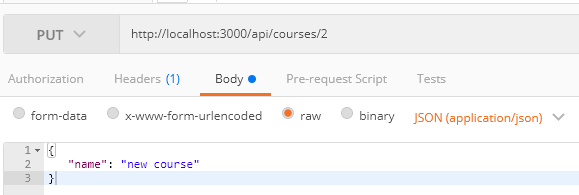

In [ ]:
// index.js
//--------------------------------------------------------
const Joi = require('joi'); //return a class
const express = require('express');
const app = express();

app.use(express.json());

const courses = [
    { id: 1, name: 'course1' },
    { id: 2, name: 'course2' },
    { id: 3, name: 'course3' },
    { id: 4, name: 'course4' },
];
app.get('/', (req, res) => { 
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send(courses);
}); 

app.post('/api/courses', (req, res) => {
    const { error } = validateCourse(req.body);
    if (error){
        //400 Bad Request
        res.status(400).send(error.details[0].message);
        return
    };
    
    const course = {
        id: courses.lenght + 1,
        name: req.body.name 
    };
    courses.push(course);
    res.send(course);
});

app.put('/api/courses/:id', (req, res) => {
    // Lok up the course
    // If not exist return 404
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) res.status(404).send('The Course with the given ID was not found');
        
    //validate
    // If invalid resturn 404, Bad Request
    const { error } = validateCourse(req.body);
    if (error){
        //400 Bad Request
        res.status(400).send(error.details[0].message);
        return
    };
    
    // Update course
    // Return the updated course
    course.name = req.body.name;
    res.send(course);
});

function validateCourse(course){
    const schema = Joi.object({
        name: Joi.string().min(3).required()
    });

    return schema.validate(course);
};


app.get('/api/courses/:id', (req,res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) res.status(404).send('The Course with the given ID was not found');
    res.send(course);
});

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});

//console
// C:\Users\sebastian\Desktop\nodejs\04_Building RESTful API Using Express>node index.js

//Postman body
//{
//     name: "new course"
//}

// output
// listening on port 3000...
// {
//     "id": 2,
//     "name": "new course"
// }

# Handling HTTP Delete Request

- **CRUD** Operations are Create, Read, Update and Delete

In [ ]:
// index.js
//--------------------------------------------------------
const Joi = require('joi'); //return a class
const express = require('express');
const app = express();

app.use(express.json());

const courses = [
    { id: 1, name: 'course1' },
    { id: 2, name: 'course2' },
    { id: 3, name: 'course3' },
    { id: 4, name: 'course4' },
];
app.get('/', (req, res) => { 
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send(courses);
}); 

app.post('/api/courses', (req, res) => {
    const { error } = validateCourse(req.body);
    if (error){
        //400 Bad Request
        res.status(400).send(error.details[0].message);
        return
    };
    
    const course = {
        id: courses.lenght + 1,
        name: req.body.name 
    };
    courses.push(course);
    res.send(course);
});

app.put('/api/courses/:id', (req, res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) res.status(404).send('The Course with the given ID was not found');
        
    const { error } = validateCourse(req.body);
    if (error){
        //400 Bad Request
        res.status(400).send(error.details[0].message);
        return
    };
    
    course.name = req.body.name;
    res.send(course);
});

app.delete('/api/courses/:id', (req, res) => {
    // Lok up the course
    // If not exist return 404
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) res.status(404).send('The Course with the given ID was not found');
        
    // Delete
    const index = courses.indexOf(course);
    courses.splice(index, 1) // Remove 1 object

    // Return the same course
    res.send(course);
});

function validateCourse(course){
    const schema = Joi.object({
        name: Joi.string().min(3).required()
    });

    return schema.validate(course);
};


app.get('/api/courses/:id', (req,res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) res.status(404).send('The Course with the given ID was not found');
    res.send(course);
});

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});

//console
// C:\Users\sebastian\Desktop\nodejs\04_Building RESTful API Using Express>node index.js

// output
// listening on port 3000...
// {
//     "id": 2,
//     "name": "new course"
// }

## Fixing Bugs

In [ ]:
// index.js
//--------------------------------------------------------
const Joi = require('joi'); //return a class
const express = require('express');
const app = express();

app.use(express.json());

const courses = [
    { id: 1, name: 'course1' },
    { id: 2, name: 'course2' },
    { id: 3, name: 'course3' },
    { id: 4, name: 'course4' },
];
app.get('/', (req, res) => { 
    res.send('Hello World');
}); 

app.get('/api/courses', (req, res) => { 
    res.send(courses);
}); 

app.post('/api/courses', (req, res) => {
    const { error } = validateCourse(req.body);
    if (error) return res.status(400).send(error.details[0].message);
    
    const course = {
        id: courses.length + 1,
        name: req.body.name 
    };
    courses.push(course);
    res.send(course);
});

app.put('/api/courses/:id', (req, res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
        
    const { error } = validateCourse(req.body);
    if (error) return res.status(400).send(error.details[0].message);
    
    course.name = req.body.name;
    res.send(course);
});

app.delete('/api/courses/:id', (req, res) => {
    // Lok up the course
    // If not exist return 404
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
        
    // Delete
    const index = courses.indexOf(course);
    courses.splice(index, 1) // Remove 1 object

    // Return the same course
    res.send(course);
});

app.get('/api/courses/:id', (req,res) => {
    const course = courses.find(x => x.id === parseInt(req.params.id));
    if (!course) return res.status(404).send('The Course with the given ID was not found');
    res.send(course);
});

function validateCourse(course){
    const schema = Joi.object({
        name: Joi.string().min(3).required()
    });

    return schema.validate(course);
};

const port = process.env.PORT || 3000;
app.listen(port, () => {
    console.log(`listening on port ${port}...`)
});

//console
// C:\Users\sebastian\Desktop\nodejs\04_Building RESTful API Using Express>node index.js

// output
// listening on port 3000...
// {
//     "id": 2,
//     "name": "new course"
// }